In [0]:
!rm -rf ..?* .[!.]* *
!git clone https://github.com/sidsenkumar11/AirKeys.git

Cloning into 'AirKeys'...
remote: Enumerating objects: 1220, done.
remote: Counting objects: 100% (1220/1220), done.
remote: Compressing objects: 100% (1156/1156), done.
remote: Total 1854 (delta 60), reused 1188 (delta 34), pack-reused 634
Receiving objects: 100% (1854/1854), 31.79 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (326/326), done.


In [0]:
pip install emnist

## This portion can be ignored -- background function

(697932, 28, 28) (116323, 28, 28)
LABELED AS: 35


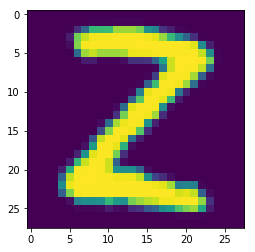

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image
# Only use this if using iPython
%matplotlib inline

from emnist import extract_training_samples, extract_test_samples
x_train, y_train = extract_training_samples('byclass')
x_test, y_test   = extract_test_samples('byclass')

print(x_train.shape, x_test.shape)

i = 0
print("LABELED AS:", y_train[i])
plt.imshow(x_train[i])

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

## This is the meat

In [0]:
x_trains = []
y_trains = []
with open('AirKeys/server/retrain/good_labels.txt', 'r') as fin:
    labels = eval(fin.read())
    
for i in range(1, 1315): # 1315
  img = cv2.imread('pic'+str(i)+'.png', cv2.IMREAD_GRAYSCALE)
  if (img is None):
    continue
  img = cv2.subtract(255, img)
  res = cv2.resize(img, dsize=(28, 28)).astype('float32')/255
  x_trains.append(res)
  #label_val = labels['AirKeys/server/retrain/good_images/pic'+str(i)+'.png']
  label_val = labels['good_images/pic'+str(i)+'.png']
  y_trains.append(label_val)
  print(i)
  
np.append(x_train, np.array(x_trains))
np.append(y_train, np.array(y_trains))
x_test2 = np.array(x_trains)
y_test2 = np.array(y_trains)

print(x_train.shape, y_train.shape)
print(np.array(x_trains).shape, np.array(y_trains).shape)
print("Done")

1
2
3
4
5
7
8
9
10
11
13
14
15
16
17
18
20
21
22
23
25
27
28
29
31
34
35
36
37
38
39
41
42
43
45
46
48
49
50
51
52
53
54
55
56
68
69
71
72
75
77
78
79
80
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
104
106
108
109
110
111
112
114
115
116
118
122
124
125
126
133
134
136
141
142
143
144
145
146
147
155
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
177
179
180
181
182
183
184
185
186
187
188
189
190
192
193
194
195
198
200
203
204
205
206
207
208
210
211
212
213
214
216
217
218
219
220
222
224
225
226
227
228
232
233
235
236
239
242
272
273
274
276
277
278
283
284
285
286
287
291
292
293
294
295
297
298
299
301
302
303
304
305
306
307
309
310
311
317
320
324
327
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
375
376
377
378
379
380
381
382
383
384
386
387
388
389
390
391
392
393
396
397
398
399
400
401
402
403
404
405
406
407
408


In [0]:
print(type(x_train))
x_train = x_train.reshape(697932, 28, 28)
y_train = y_train.reshape(697932, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(116323, 28, 28)
y_test = y_test.reshape(116323, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
x_test2 = x_test2.reshape(1058, 28, 28)
y_test2 = y_test2.reshape(1058, 1)
x_test2 = x_test2.reshape(x_test2.shape[0], 28, 28, 1).astype('float32')/255

<class 'numpy.ndarray'>


## Load old model

In [0]:
from keras.models import load_model
model = load_model('AirKeys/server/emnist_letter_digits.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1606144   
_________________________________________________________________
dropout_8 (Dropout)         

## Train on new stuff only

In [0]:
model.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
697932/697932 [==============================] - 64s 91us/step - loss: 0.3336 - acc: 0.8746
Epoch 2/10
697932/697932 [==============================] - 59s 85us/step - loss: 0.3334 - acc: 0.8756
Epoch 3/10
697932/697932 [==============================] - 59s 84us/step - loss: 0.3347 - acc: 0.8753
Epoch 4/10
697932/697932 [==============================] - 59s 84us/step - loss: 0.3356 - acc: 0.8753
Epoch 5/10
697932/697932 [==============================] - 59s 84us/step - loss: 0.3367 - acc: 0.8751
Epoch 6/10
697932/697932 [==============================] - 59s 84us/step - loss: 0.3373 - acc: 0.8750
Epoch 7/10
697932/697932 [==============================] - 58s 84us/step - loss: 0.3377 - acc: 0.8750
Epoch 8/10
697932/697932 [==============================] - 59s 84us/step - loss: 0.3385 - acc: 0.8750
Epoch 9/10
697932/697932 [==============================] - 59s 84us/step - loss: 0.3391 - acc: 0.8748
Epoch 10/10
697932/697932 [==============================] - 58s 83us/ste

In [0]:
model.evaluate(x_train, y_train)

697932/697932 [==============================] - 51s 73us/step


[5.734383971826012, 0.05498243381881014]